<a href="https://colab.research.google.com/github/Neyder2502/salud-mental-analisis-datos/blob/main/notebooks/Neyder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CODIGO PRINCIPAL

## LIBRERIAS

In [22]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
from scipy.stats import pearsonr, spearmanr
from scipy.stats import linregress

## ARCHIVO CSV

In [3]:
from google.colab import files
uploaded = files.upload()
filename = list(uploaded.keys())[0]
df = pd.read_csv(filename)
print("Archivo cargado correctamente")

Saving Mental_Health_and_Social_Media_Balance_Dataset.csv to Mental_Health_and_Social_Media_Balance_Dataset.csv
Archivo cargado correctamente


## ESTRUCTURA Y CALIDAD DE DATOS

In [ ]:
df.head()

In [ ]:
df.info()

In [ ]:
df.columns

In [ ]:
df.isna().sum()

## DETECCION DE VALORES ATIPICOS  (REVISAR Y ENTENDER)



In [ ]:
df.boxplot(column=['Daily_Screen_Time(hrs)'])
plt.title('Outliers - Horas de pantalla')
plt.show()

df.boxplot(column=['Sleep_Quality(1-10)'])
plt.title('Outliers - Calidad de sueño')
plt.show()

df.boxplot(column=['Stress_Level(1-10)'])
plt.title('Outliers - Estrés')
plt.show()

df.boxplot(column=['Happiness_Index(1-10)'])
plt.title('Outliers - Felicidad')
plt.show()

In [ ]:
print("Edades fuera de rango:")
display(df[(df['Age'] < 10) | (df['Age'] > 80)])

print("\nHoras de pantalla fuera de rango:")
display(df[(df['Daily_Screen_Time(hrs)'] < 0) | (df['Daily_Screen_Time(hrs)'] > 24)])

print("\nCalidad de sueño fuera de 1-10:")
display(df[(df['Sleep_Quality(1-10)'] < 1) | (df['Sleep_Quality(1-10)'] > 10)])

print("\nEstrés fuera de 1-10:")
display(df[(df['Stress_Level(1-10)'] < 1) | (df['Stress_Level(1-10)'] > 10)])

print("\nFelicidad fuera de 1-10:")
display(df[(df['Happiness_Index(1-10)'] < 1) | (df['Happiness_Index(1-10)'] > 10)])

print("\nDías sin redes fuera de rango:")
display(df[(df['Days_Without_Social_Media'] < 0) | (df['Days_Without_Social_Media'] > 30)])

## ESTADISTICAS Y DISTRIBUICION DE VARIABLES (revisar)

### estadistica (buscar que singifica la desviacion estandar)

In [15]:
df.describe().round(3)

,Age,Daily_Screen_Time(hrs),Sleep_Quality(1-10),Stress_Level(1-10),Days_Without_Social_Media,Exercise_Frequency(week),Happiness_Index(1-10)
count,500.000,500.000,500.000,500.000,500.000,500.000,500.000
mean,32.988,5.530,6.304,6.618,3.134,2.448,8.376
std,9.961,1.735,1.530,1.543,1.859,1.428,1.524
min,16.000,1.000,2.000,2.000,0.000,0.000,4.000
25%,24.000,4.300,5.000,6.000,2.000,1.000,7.000
50%,34.000,5.600,6.000,7.000,3.000,2.000,9.000
75%,41.000,6.700,7.000,8.000,5.000,3.000,10.000
max,49.000,10.800,10.000,10.000,9.000,7.000,10.000


### distribucion

In [16]:
df['Age'].value_counts()

,count
Age,
48,23
43,22
47,21
39,20
41,20
31,19
27,19
40,18
38,18


In [17]:
df['Gender'].value_counts()

,count
Gender,
Male,248
Female,229
Other,23


In [ ]:
df['Daily_Screen_Time(hrs)'].value_counts()

In [ ]:
df['Sleep_Quality(1-10)'].value_counts()

In [ ]:
df['Stress_Level(1-10)'].value_counts()

In [ ]:
df['Days_Without_Social_Media'].value_counts()

In [ ]:
df['Exercise_Frequency(week)'].value_counts()

In [ ]:
df['Social_Media_Platform'].value_counts()

In [ ]:
df['Happiness_Index(1-10)'].value_counts()

# HABITOS DIGITALES Y SALUD MENTAL

In [ ]:
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

## EDAD VS HORAS EN PANTALLA


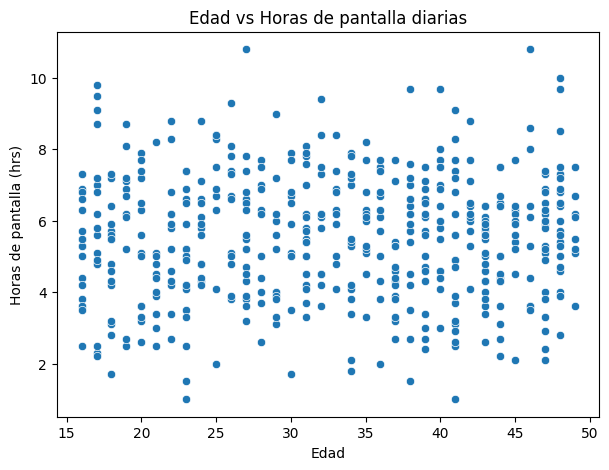

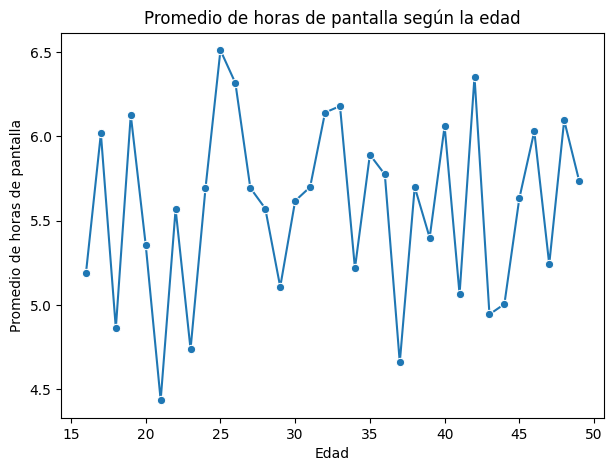

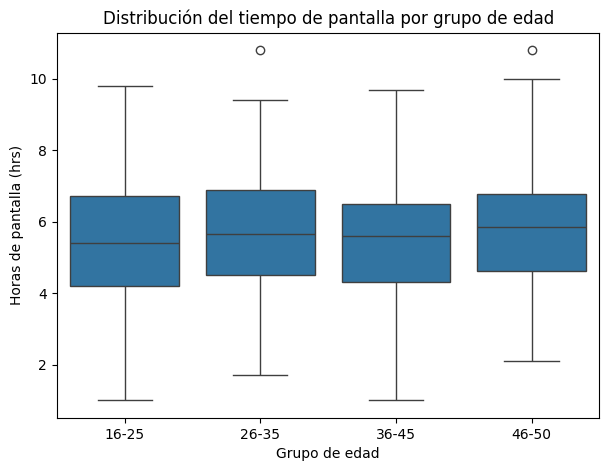


--- Correlación Edad vs Horas de pantalla ---
Coeficiente de Pearson: 0.024
P-value: 0.6000
✘ No hay correlación significativa.


In [18]:
# SCATTERPLOT
plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x="Age", y="Daily_Screen_Time(hrs)")
plt.title("Edad vs Horas de pantalla diarias")
plt.xlabel("Edad")
plt.ylabel("Horas de pantalla (hrs)")
plt.show()

# LINEPLOT (promedio por edad)
edad_prom = df.groupby("Age")["Daily_Screen_Time(hrs)"].mean().reset_index()

plt.figure(figsize=(7,5))
sns.lineplot(data=edad_prom, x="Age", y="Daily_Screen_Time(hrs)", marker="o")
plt.title("Promedio de horas de pantalla según la edad")
plt.xlabel("Edad")
plt.ylabel("Promedio de horas de pantalla")
plt.show()

# BOXES POR GRUPOS DE EDAD
bins = [15, 25, 35, 45, 50]
labels = ["16-25", "26-35", "36-45", "46-50"]
df["Grupo_Edad"] = pd.cut(df["Age"], bins=bins, labels=labels)

plt.figure(figsize=(7,5))
sns.boxplot(data=df, x="Grupo_Edad", y="Daily_Screen_Time(hrs)")
plt.title("Distribución del tiempo de pantalla por grupo de edad")
plt.xlabel("Grupo de edad")
plt.ylabel("Horas de pantalla (hrs)")
plt.show()

# CORRELACION NUMÉRICA
corr, pvalue = pearsonr(df['Age'], df['Daily_Screen_Time(hrs)'])

print("\n--- Correlación Edad vs Horas de pantalla ---")
print(f"Coeficiente de Pearson: {corr:.3f}")
print(f"P-value: {pvalue:.4f}")

if pvalue < 0.05:
    print("✔ La correlación es estadísticamente significativa.")
else:
    print("✘ No hay correlación significativa.")

## HORAS DE PANTALLA VS ESTRES

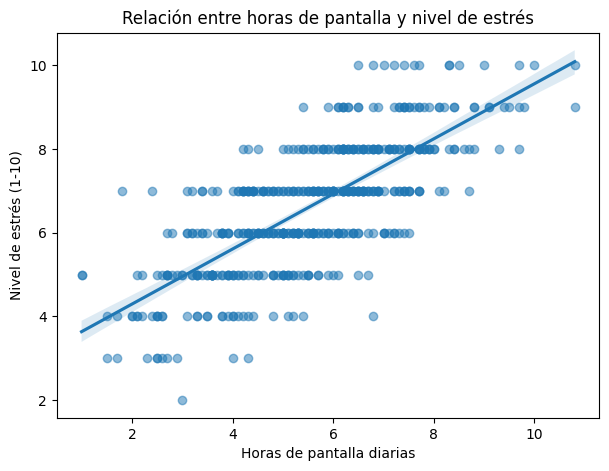

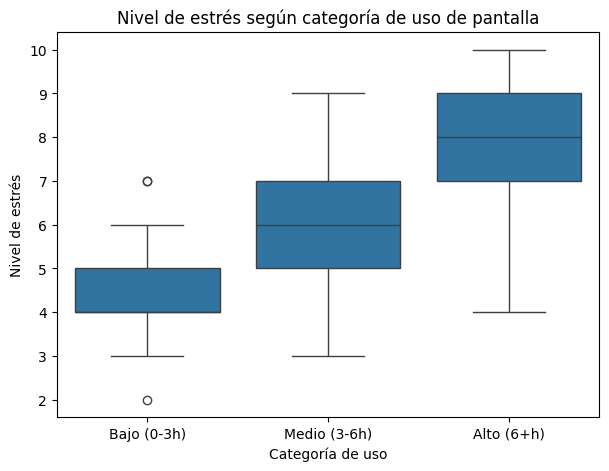

/tmp/ipython-input-1176006845.py:41: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tabla_heatmap = df.groupby(["Cat_Pantalla", "Stress_Level(1-10)"]).size().unstack(fill_value=0)


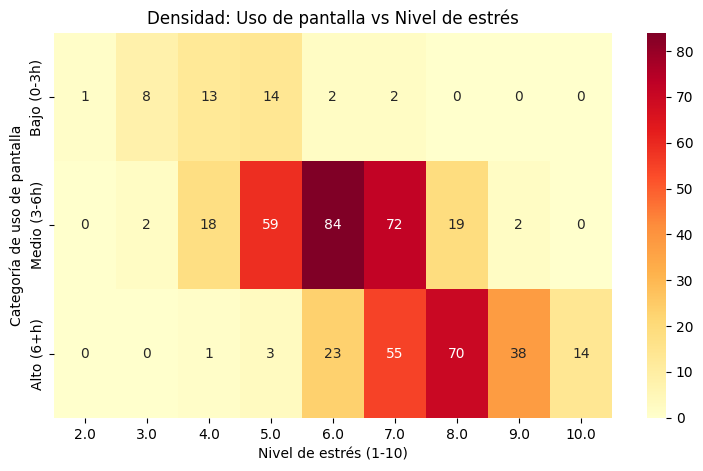


--- Correlación Horas de pantalla vs Estrés ---
Coeficiente de Pearson: 0.740
P-value: 0.0000
✔ La correlación es estadísticamente significativa.

Promedio de estrés por categoría de uso:
Cat_Pantalla
Bajo (0-3h)     4.35
Medio (3-6h)    6.06
Alto (6+h)      7.76
Name: Stress_Level(1-10), dtype: float64


/tmp/ipython-input-1176006845.py:68: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby("Cat_Pantalla")["Stress_Level(1-10)"].mean().round(2))


In [21]:
# Regplot
plt.figure(figsize=(7,5))
sns.regplot(
    data=df,
    x="Daily_Screen_Time(hrs)",
    y="Stress_Level(1-10)",
    scatter_kws={"alpha":0.5}
)
plt.title("Relación entre horas de pantalla y nivel de estrés")
plt.xlabel("Horas de pantalla diarias")
plt.ylabel("Nivel de estrés (1-10)")
plt.show()

#Boxplot por categorías de uso
bins = [0, 3, 6, 12]
labels = ["Bajo (0-3h)", "Medio (3-6h)", "Alto (6+h)"]
df["Cat_Pantalla"] = pd.cut(df["Daily_Screen_Time(hrs)"], bins=bins, labels=labels)

plt.figure(figsize=(7,5))
sns.boxplot(data=df, x="Cat_Pantalla", y="Stress_Level(1-10)")
plt.title("Nivel de estrés según categoría de uso de pantalla")
plt.xlabel("Categoría de uso")
plt.ylabel("Nivel de estrés")
plt.show()

# 3. Heatmap de densidad
tabla_heatmap = df.groupby(["Cat_Pantalla", "Stress_Level(1-10)"]).size().unstack(fill_value=0)

plt.figure(figsize=(9,5))
sns.heatmap(tabla_heatmap, annot=True, fmt='d', cmap="YlOrRd")
plt.title("Densidad: Uso de pantalla vs Nivel de estrés")
plt.xlabel("Nivel de estrés (1-10)")
plt.ylabel("Categoría de uso de pantalla")
plt.show()

#relación numérica
corr, pvalue = pearsonr(df["Daily_Screen_Time(hrs)"], df["Stress_Level(1-10)"])

print("\n--- Correlación Horas de pantalla vs Estrés ---")
print(f"Coeficiente de Pearson: {corr:.3f}")
print(f"P-value: {pvalue:.4f}")

if pvalue < 0.05:
    print("✔ La correlación es estadísticamente significativa.")
else:
    print("✘ No hay correlación significativa.")

# 5. Promedio de estrés por categoría
print("\nPromedio de estrés por categoría de uso:")
print(df.groupby("Cat_Pantalla")["Stress_Level(1-10)"].mean().round(2))



## HORAS DE PANTALLA VS FELICIDAD

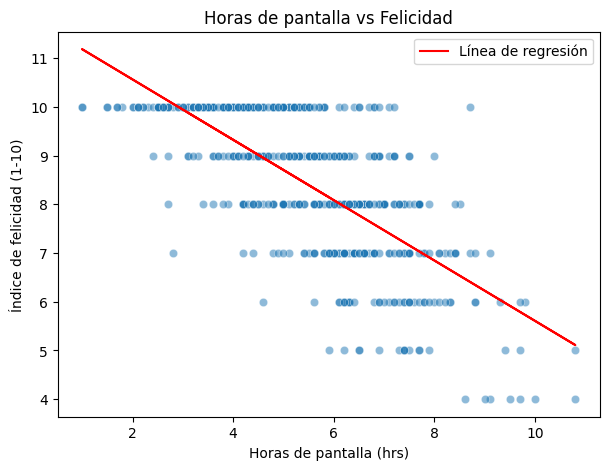

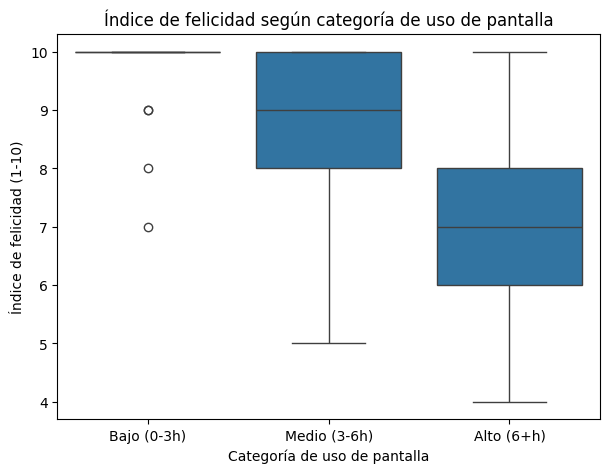


--- Regresión Lineal: Pantalla vs Felicidad ---
Pendiente: -0.6196
Intercepto: 11.8023
R² (coef. de determinación): 0.4973
P-valor: 0.0000
✔ La relación es estadísticamente significativa.


In [25]:
# Regplot
x = df['Daily_Screen_Time(hrs)']
y = df['Happiness_Index(1-10)']

resultado = linregress(x, y)

plt.figure(figsize=(7,5))
sns.scatterplot(x=x, y=y, alpha=0.5)
plt.plot(x, resultado.intercept + resultado.slope*x, color='red', label='Línea de regresión')

plt.title(f"Horas de pantalla vs Felicidad")
plt.xlabel("Horas de pantalla (hrs)")
plt.ylabel("Índice de felicidad (1-10)")
plt.legend()
plt.show()

# Boxplot por categorías de uso
plt.figure(figsize=(7,5))
sns.boxplot(data=df, x="Cat_Pantalla", y="Happiness_Index(1-10)")
plt.title("Índice de felicidad según categoría de uso de pantalla")
plt.xlabel("Categoría de uso de pantalla")
plt.ylabel("Índice de felicidad (1-10)")
plt.show()

# Resultados
print("\n--- Regresión Lineal: Pantalla vs Felicidad ---")
print(f"Pendiente: {resultado.slope:.4f}")
print(f"Intercepto: {resultado.intercept:.4f}")
print(f"R² (coef. de determinación): {resultado.rvalue**2:.4f}")
print(f"P-valor: {resultado.pvalue:.4f}")

if resultado.pvalue < 0.05:
    print("✔ La relación es estadísticamente significativa.")
else:
    print("✘ No hay evidencia estadística de relación.")

## DIAS SIN REDES VS ESTRES/FELICIDAD

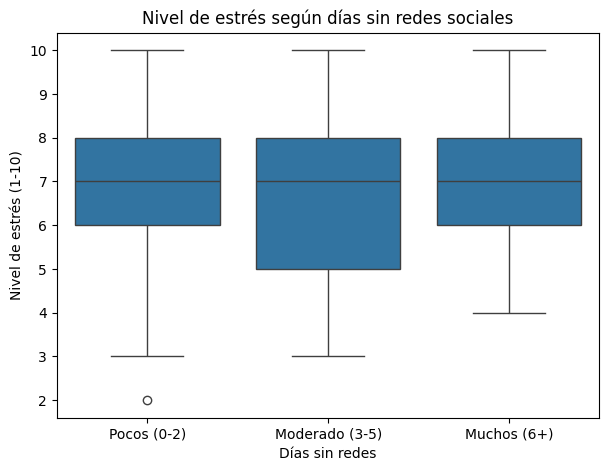

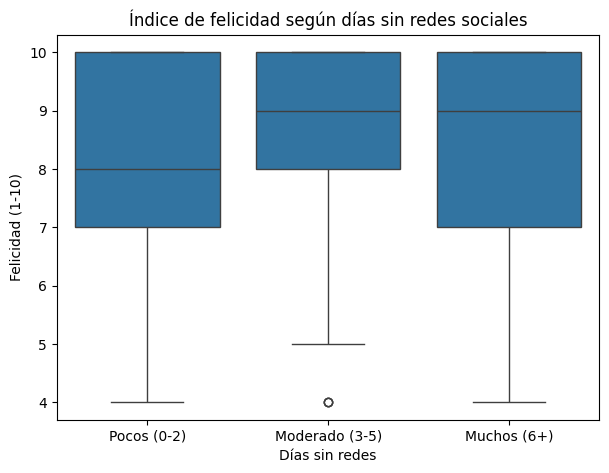

/tmp/ipython-input-1063982484.py:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  promedios = df.groupby('Cat_Descanso')[['Stress_Level(1-10)', 'Happiness_Index(1-10)']].mean()


<Figure size 700x500 with 0 Axes>

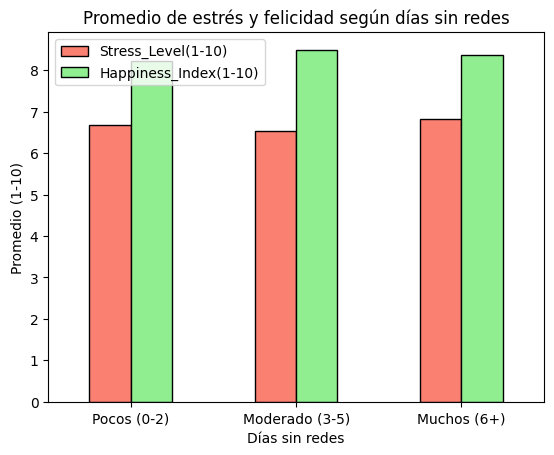


--- ¿Desintoxicarse ayuda? ---

Promedio de estrés por categoría:
Cat_Descanso
Pocos (0-2)       6.67
Moderado (3-5)    6.54
Muchos (6+)       6.82
Name: Stress_Level(1-10), dtype: float64

Promedio de felicidad por categoría:
Cat_Descanso
Pocos (0-2)       8.22
Moderado (3-5)    8.49
Muchos (6+)       8.37
Name: Happiness_Index(1-10), dtype: float64


In [26]:
# Crear categorías de descanso
bins_dias = [-1, 2, 5, 10]
labels_dias = ['Pocos (0-2)', 'Moderado (3-5)', 'Muchos (6+)']
df['Cat_Descanso'] = pd.cut(df['Days_Without_Social_Media'], bins=bins_dias, labels=labels_dias)

# 1. Boxplot: Días sin redes vs Estrés
plt.figure(figsize=(7,5))
sns.boxplot(data=df, x='Cat_Descanso', y='Stress_Level(1-10)')
plt.title("Nivel de estrés según días sin redes sociales")
plt.xlabel("Días sin redes")
plt.ylabel("Nivel de estrés (1-10)")
plt.show()

# 2. Boxplot: Días sin redes vs Felicidad
plt.figure(figsize=(7,5))
sns.boxplot(data=df, x='Cat_Descanso', y='Happiness_Index(1-10)')
plt.title("Índice de felicidad según días sin redes sociales")
plt.xlabel("Días sin redes")
plt.ylabel("Felicidad (1-10)")
plt.show()

# 3. Barras comparativas de promedios
promedios = df.groupby('Cat_Descanso')[['Stress_Level(1-10)', 'Happiness_Index(1-10)']].mean()

plt.figure(figsize=(7,5))
promedios.plot(kind='bar', color=['salmon', 'lightgreen'], edgecolor='black')
plt.title("Promedio de estrés y felicidad según días sin redes")
plt.xlabel("Días sin redes")
plt.ylabel("Promedio (1-10)")
plt.xticks(rotation=0)
plt.show()

# 4. Impresión de los promedios
print("\n--- ¿Desintoxicarse ayuda? ---")

print("\nPromedio de estrés por categoría:")
print(promedios['Stress_Level(1-10)'].round(2))

print("\nPromedio de felicidad por categoría:")
print(promedios['Happiness_Index(1-10)'].round(2))


## PLATAFORMA FAVORITA VS ESTRES

/tmp/ipython-input-83237729.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=estres_plataforma.index, y=estres_plataforma.values, palette="Reds_r")


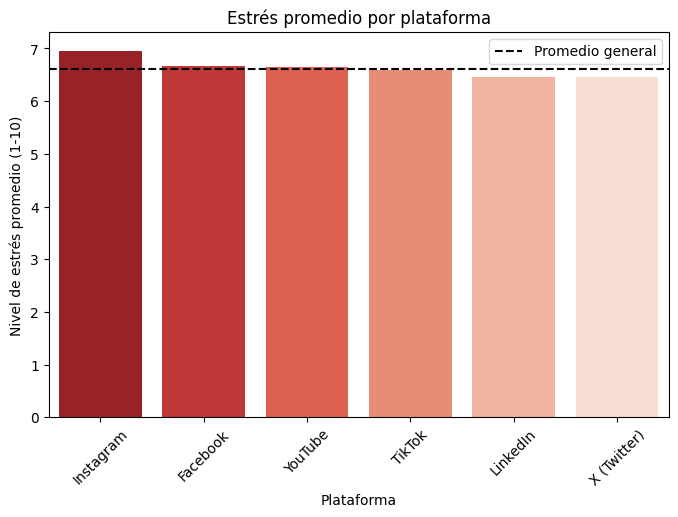

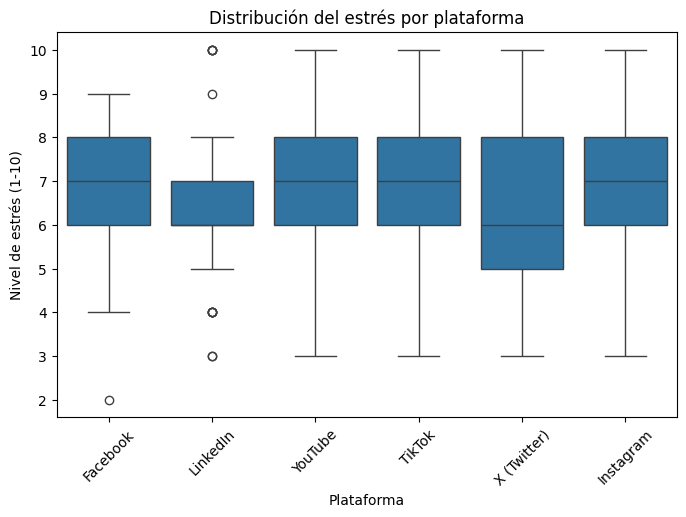

<Figure size 900x600 with 0 Axes>

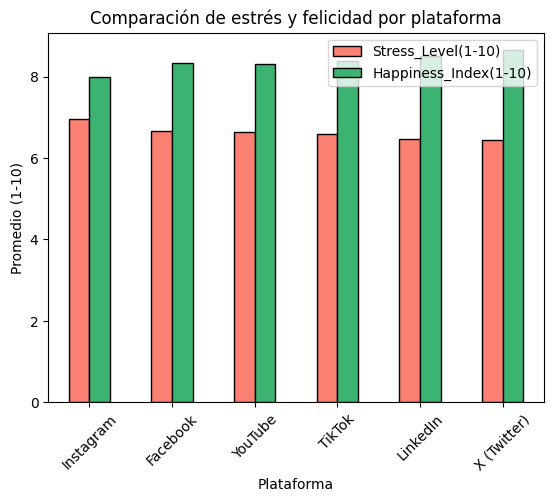


--- ¿Hay redes más tóxicas? ---

Estadísticas por plataforma:

                      Stress_Level(1-10)             Happiness_Index(1-10)  \
                                    mean   std count                  mean   
Social_Media_Platform                                                        
Facebook                            6.67  1.47    81                  8.35   
Instagram                           6.96  1.51    74                  7.99   
LinkedIn                            6.46  1.48    87                  8.52   
TikTok                              6.59  1.67    95                  8.38   
X (Twitter)                         6.45  1.55    88                  8.65   
YouTube                             6.64  1.54    75                  8.31   

                             
                        std  
Social_Media_Platform        
Facebook               1.48  
Instagram              1.57  
LinkedIn               1.35  
TikTok                 1.63  
X (Twitter)            

In [27]:
# Calcular promedio de estrés por plataforma
estres_plataforma = (
    df.groupby('Social_Media_Platform')['Stress_Level(1-10)']
      .mean()
      .sort_values(ascending=False))

# 1. Barras de estrés por plataforma
plt.figure(figsize=(8,5))
sns.barplot(x=estres_plataforma.index, y=estres_plataforma.values, palette="Reds_r")
plt.axhline(y=df['Stress_Level(1-10)'].mean(), color="black", linestyle="--", label="Promedio general")

plt.title("Estrés promedio por plataforma")
plt.xlabel("Plataforma")
plt.ylabel("Nivel de estrés promedio (1-10)")
plt.xticks(rotation=45)
plt.legend()
plt.show()

# 2. Boxplot del estrés por plataforma
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='Social_Media_Platform', y='Stress_Level(1-10)')
plt.title("Distribución del estrés por plataforma")
plt.xlabel("Plataforma")
plt.ylabel("Nivel de estrés (1-10)")
plt.xticks(rotation=45)
plt.show()

# 3. Comparación: Estrés vs Felicidad
comparacion = (
    df.groupby('Social_Media_Platform')[['Stress_Level(1-10)', 'Happiness_Index(1-10)']]
      .mean()
      .sort_values('Stress_Level(1-10)', ascending=False)
)

plt.figure(figsize=(9,6))
comparacion.plot(kind='bar', color=['salmon', 'mediumseagreen'], edgecolor='black')
plt.title("Comparación de estrés y felicidad por plataforma")
plt.xlabel("Plataforma")
plt.ylabel("Promedio (1-10)")
plt.xticks(rotation=45)
plt.show()

# 4. Tabla estadística completa
print("\n--- ¿Hay redes más tóxicas? ---\n")

stats_plataforma = df.groupby('Social_Media_Platform').agg({
    'Stress_Level(1-10)': ['mean', 'std', 'count'],
    'Happiness_Index(1-10)': ['mean', 'std']
}).round(2)

print("Estadísticas por plataforma:\n")
print(stats_plataforma)

print("\nRanking de plataformas por estrés (de mayor a menor):\n")
print(estres_plataforma.round(2))